<strong>IMPORTANT: </strong> Please run this in Google Colab and consult the User Guide before running

***

<h1>Classification - Convolutional Neural Network - Histopathologic Cancer Detection</h1>
<p>
The Dataset I have chosen is the Histopathlogic Cancer dataset, taken from Kaggle competition
    <ul>
        <li>This Dataset essentially contains</li>
        <li>6gb of images containing cancer cells</li>
        <li>The id per image</li>
        <li>The class variable that will dictate if cancer has been detected or not</li>
    </ul>
<a href='https://www.kaggle.com/c/histopathologic-cancer-detection'>https://www.kaggle.com/c/histopathologic-cancer-detection</a>
</p>

***

## <h1>Table of Contents:</h1>
* [What / Why a Convolutional Neural Network](#what-why-cnn)
* [Task Overview](#overview)
* [Imports](#imports)
* [Google Colab Directory Setup](#colab)
* [EDA and Preprocessing](#eda)
* [Splitting the Data](#split)
* [Creating CNN Layers](#cnn-layer)
* [Training and Compiling CNN](#cnn)
* [Model evaluation](#eval)

***

## What / Why a Convolutional Neural Network <a class="anchor" id="what-why-cnn"></a>
<p>
Convolutional Neural Network (CNN) is more powerful / robust type of neural network. However CNN are specilized to work with image datasets, to perform classifcation detections
<br><br>
CNN operate by taking in an input image, assign importance (weights and biases) to various aspect in the image, and be able to differentiate one from the other. CNN are composed of multiple layers of artificial neurons. Artificial neurons, a rough imitation of their biological counterparts, are mathematical functions that calculate the weighted sum of multiple inputs and outputs an activation value. When you input an image in a ConvNet, each layer generates several activation functions that are passed on to the next layer. (IBM, 2020)
<br><br>
This is why CNN will be fit for the Hisopathologic Cancer dataset, since it is purely images with just a class column and no other features, CNN will be useful for analyzing the the image data. (IBM, 2020)
<br><br>
IBM, 2020, Convolutional Neural Networks. 20 October 2020. [Online]. Available at: https://www.ibm.com/cloud/learn/convolutional-neural-networks [Accessed 20 November 2020].
</p>

***

## Task Overview <a class="anchor" id="overview"></a>
<p>
For this notebook the main mission will be to construct a CNN model that will process the image data and peform a binary classification to determine whether the cancer has been detected on the cells.
<br>
The process will be as follow:
    <ol>
        <li>Import the necessary packages</li>
        <li>Set correct directories on Google Colab</li>
        <li>Download the dataset from Kaggle competiion</li>
        <li>Pefrom EDA and perform any cleaning needed</li>
        <li>Split the data and preform the preprocessing of the image data (Data Augmentation)</li>
        <li>Build the CNN model's layers</li>
        <li>Run the model</li>
        <li>Analyze / Evaluate the model outputs (model accuracy and model loss)</li>
    </ol>
</p>

***

## Imports <a id="imports"></a>

In [1]:
# for data manipulation
import pandas as pd
import numpy as np

In [2]:
# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# os library in Python provides functions for interacting with the operating system.
import os
# cv2 will use OpenCV, is a library that allows you to perform image processing and computer vision tasks. This will needed to process the images.
import cv2

In [4]:
# Shuffle arrays or sparse matrices in a consistent way needed to normalize the data imbalance
from sklearn.utils import shuffle
# For data training/testing spliting
from sklearn.model_selection import train_test_split
# Pipline I will set up for evaluation analysis
from sklearn.pipeline import Pipeline

In [5]:
# Tensorflow and Keras will be used for the construction of the CNN model's layers
import tensorflow as tf
from tensorflow import keras
# Image Data Generator used for data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Import various layers needed for the architecture from keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, Activation
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

In [6]:
# I will need the following metrics to evaluate it's performance
# classification_report will display the a report with it's Precision and Recall score (will explain those concepts deeper into the Notebook) 
# confusion_matrix will display the matrix of the model performed with it's predictions, this will be done by displaying it's True Negative, True Positive, False Negative and False Positive predicitons
# accuracy_score will display the overall accuracy of the current model
# roc_curve will be used to display the Received Operator Characteristic chart
# roc_auc_score will be used to calculate and display the Area Under the Curve unit
# Importing the various metrics needed to evaluate the models I will be using
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

In [7]:
from IPython.display import display, HTML
import itertools
import shutil

In [8]:
import os.path
from os import path

In [9]:
# Google colab function to allow file upload
from google.colab import files

***

## Google Colab Directory Setup <a id="colab"></a>

<p>This stage will be crucial, as we will now be creating all the correct directorys on colab, in order for this notebook to operate correctly</p>

In [11]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
! pip install -q kaggle

<p>First installing Kaggle onto a fresh Google Colab Directory</p>

In [13]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dylanadimoolum","key":"1bf3e9fe081713b80f7a7324a9759c3b"}'}

<p>Next to upload your Kaggle.json file, this will authenticate you and give you permission to download the dataset</p>

In [14]:
# Parent Directory path
directory = '.kaggle'
parent_dir = "/root/"
  
# Path way to the directory
path = os.path.join(parent_dir, directory)
  
# Create the directory
os.mkdir(path)

<p>Creating the directory to store the kaggle json file, the kaggle requires the file to live in a .kaggle folder</p>

In [15]:
shutil.move('/content/kaggle.json', '/root/.kaggle/')

'/root/.kaggle/kaggle.json'

<p>By default uploaded files are kept the content folder, the shutil method is just moving the json file to the correct directory now</p>

In [16]:
! cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [17]:
! chmod 600 ~/.kaggle/kaggle.json

<p>Confirming if the file is now living in the correct directory</p>

<p>If all goes to plan, the next step is to step the folder for the actual dataset and download it</p>

In [19]:
os.mkdir('/content/Dataset')
os.chdir('/content/Dataset')

In [20]:
url = '/content/Dataset/'

<p>Next step is to create an actual Dataset and set a url variable as it</p>

In [21]:
! kaggle datasets list

ref                                                             title                                       size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -----------------------------------------  -----  -------------------  -------------  ---------  ---------------  
akshaydattatraykhare/diabetes-dataset                           Diabetes Dataset                             9KB  2022-10-06 08:55:25          15213        447  1.0              
akshaydattatraykhare/data-for-admission-in-the-university       Data for Admission in the University         4KB  2022-10-27 11:05:45           3699         81  1.0              
aneesayoub/world-universities-ranking-2022                      World Universities Ranking 2022             41KB  2022-11-17 03:47:37           1045         28  0.9117647        
whenamancodes/covid-19-coronavirus-pandemic-dataset             COVID -19 Coronavirus Pandemic Dataset   

<p>Now to check if the Kaggle permission is working, I list the current popular datasets from kaggle and see if the API can pull anything</p>

In [22]:
!kaggle competitions download -c histopathologic-cancer-detection

100% 6.31G/6.31G [04:54<00:00, 23.8MB/s]
100% 6.31G/6.31G [04:54<00:00, 23.0MB/s]


<p>
If everything goes to plan, then you can start downloading the Histopathlogic cancer detection dataset
<br><br>
Assuming this is all being down via Colab with GPU runtime, the actual download should be relatively fast for 6gb dataset
<br><br>
On my end, this took me around 5 mins
</p>

In [23]:
! mkdir cancer-data

<p>Once the download is completed, then created a directory to hold the cancer data, then begin to unpack the data<p>

In [24]:
! unzip histopathologic-cancer-detection.zip -d cancer-data

Streaming output truncated to the last 5000 lines.
  inflating: cancer-data/train/fa2c546059bd262cbe954dfdba24dc0d67f598b0.tif  
  inflating: cancer-data/train/fa2c657eff58b6802cb32843caa2fac25b67c2c9.tif  
  inflating: cancer-data/train/fa2c775c4457d0aeb7e57216849eef5f4e72e566.tif  
  inflating: cancer-data/train/fa2c77e1707c2fe7b0016e00736fb6e4b7f09488.tif  
  inflating: cancer-data/train/fa2ce5e802dd281bd98fcfb538e80b9c96c2b7af.tif  
  inflating: cancer-data/train/fa2d24e4a109d2d3a925890aaed4e0f038dfffb0.tif  
  inflating: cancer-data/train/fa2d7e4865aa7869d2dd85116323b8405c94f1c2.tif  
  inflating: cancer-data/train/fa2d8b2e4acf46e278e2e7acbc034c263d970737.tif  
  inflating: cancer-data/train/fa2df9148831509a181797db79eb1a7bf39593f1.tif  
  inflating: cancer-data/train/fa2e6db0b35484797f58005e3a6e24ca75fbca76.tif  
  inflating: cancer-data/train/fa2e80e84594465329bdc0c8d1b3a507275fbb4d.tif  
  inflating: cancer-data/train/fa2eaf8ec6267fa928a88775dc15ee25b633c537.tif  
  inflating: 

<p>
Since we are unpacking over 160000 images, this might take a while
<br><br>
However once that is done (and assumming everything went according to plan) we can finally start some EDA and Preprocessing
</p>

***

## EDA and Preprocessing <a id="eda"></a>

In [25]:
url = '/content/Dataset/cancer-data'
os.listdir(url)
print(len(os.listdir(url+'/train')))
print(len(os.listdir(url+'/test')))

220025
57458


<p>
Now to perform some EDA and Preprocessing
<br><br>
For thing is to create a url variable to act as a pathway to the cancer data
<br><br>
Then print out much train and test data was in the dataset zipped folder
</p>

<p>In total there is at least 220025 training data and 57458 test data (This includes both the images and their ID parameters seperately)</p>

In [26]:
df = pd.read_csv(url+'/train_labels.csv')
# removing this image because it caused a training error previously
df[df['id'] != 'dd6dfed324f9fcb6f93f46f32fc800f2ec196be2']
# removing this image because it's black
df[df['id'] != '9369c7278ec8bcc6c880d99194de09fc2bd4efbe']

print(df.shape)

(220025, 2)


<p>
We can see there is a total 220025 of data in the this dataset and 2 variables acting as the columns.
<br><br>
One column is acting as the ID's for each individual image and the other is the classifcation value to estimate whether there is cancer being detected
</p>

0    130908
1     89117
Name: label, dtype: int64

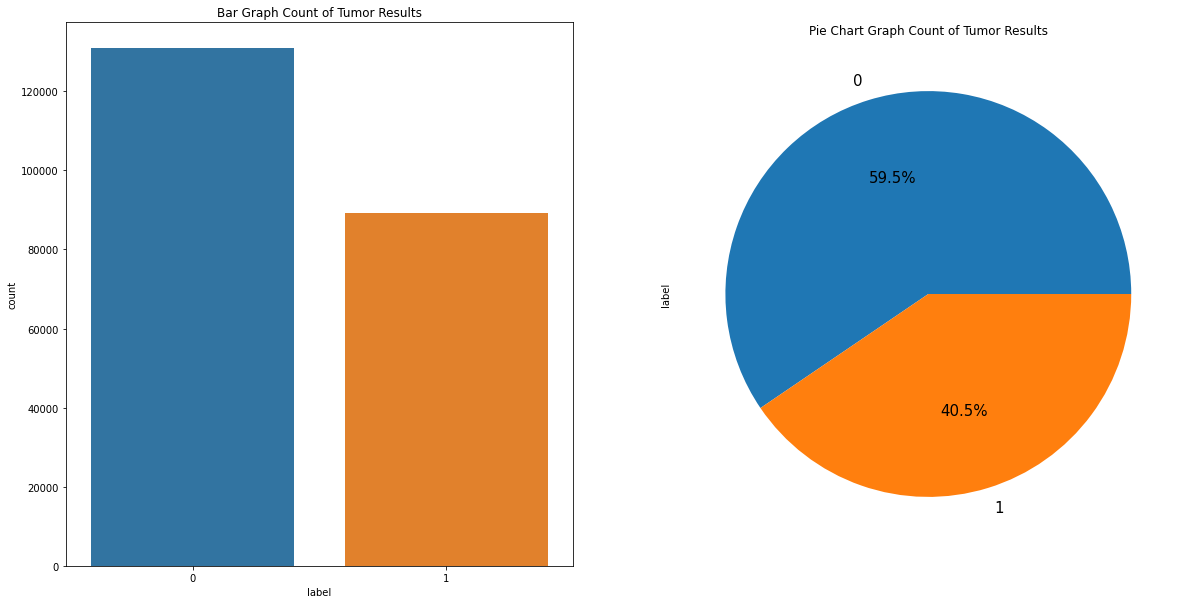

In [27]:
df['label'].value_counts()
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))
ax1.set_title('Bar Graph Count of Tumor Results')
ax2.set_title('Pie Chart Graph Count of Tumor Results')
sns.countplot(x=df['label'], ax=ax1)
df['label'].value_counts().plot.pie(autopct='%1.1f%%',shadow=False,textprops={'fontsize': 15},ax=ax2) 
df['label'].value_counts()

<p>
Lets do some analysis on the target variable.
<br><br>
With the target variable, I can see I am dealing with Binary Classification since the two values are either 0 = no cancer detected or 1 = cancer detected.
<br><br>
To show the distribution of them, I have create a bar graph and pie chart.
<br><br>
For the Bar Graph we can see that 0 (no cancer detected) is taking the majority of the target variable. This is double confirmed thanks to the pie chart with 0 (no cancer detected) taking up to 59.5% of the distribution.
<br><br>
Not only does this tell me, that I am dealing with Binary Classification, but this also tells me that I will need to balance out the columns, if I want my models to perform well with the data.
</p>

In [28]:
def draw_category_images(col_name,figure_cols, df, IMAGE_PATH):
    # categories will act as the label for each image
    categories = (df.groupby([col_name])[col_name].nunique()).index
    # compiling the images using matplotlib for added flexiability
    f, ax = plt.subplots(nrows=len(categories),ncols=figure_cols, 
                         figsize=(4*figure_cols,4*len(categories)))
    # draw a number of images for each location
    for i, cat in enumerate(categories):
        # figure_cols is also the sample size
        sample = df[df[col_name]==cat].sample(figure_cols)
        for j in range(0,figure_cols):
            file=IMAGE_PATH + sample.iloc[j]['id'] + '.tif'
            im=cv2.imread(file)
            ax[i, j].imshow(im, resample=True, cmap='gray')
            ax[i, j].set_title(cat, fontsize=16)  
    plt.tight_layout()
    plt.show()

<p>
Next to display images of cells with cancer and with out cancer detected.
<br><br>
To do this I have created a custom definition named draw_category_images(). 
<br><br>
The code for the above definition has been attributed from the Honey Bee Subspecies Classification Notebook from Kaggle.
<br>
Attribution: https://www.kaggle.com/gpreda/honey-bee-subspecies-classification
<br><br>
This definition accepts 4 parameters. First the column name of the y variable, second is the number of columns per image to be displayed, third is the actual dataframe containing the data, fourth / last is the url pathway to the datasource.
</p>

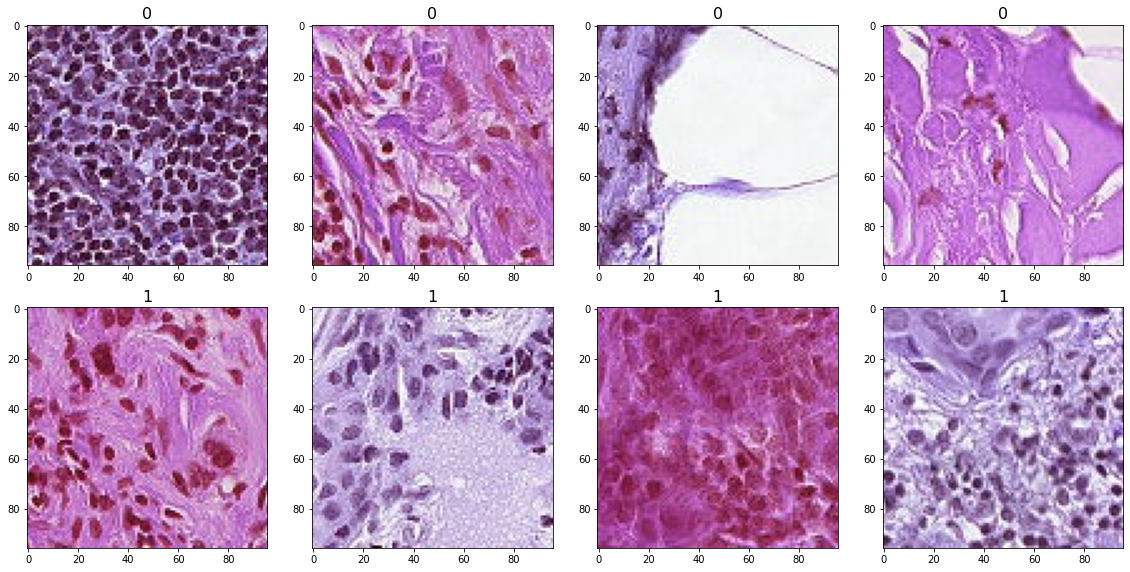

In [29]:
IMAGE_PATH = url+'/train/'
draw_category_images('label',4,df,IMAGE_PATH)

<p>Now feeding the method the correct parameters, we can see a png with 4 columns with 2 rows, upper rows are cells with no cancer detected and lower row has cancer detected
<br><br>
Now granted I am no doctor, But from my own analysis and self research. The healthy cells (upper row) follow a form of regularity. The best example is the very first image as the cells are regulary in their shape and size. Where as the first image on the bottom left the cells are very meshed out with irregular shapes, showing that it has become cancerous
<br><br>
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3587978/#:~:text=In%20histology%20image%20analysis%20for,and%20determine%20the%20malignancy%20level.
<br>
If you feel like growing your domain knowledge
</p>

In [30]:
df.head()

,id,label
0,f38a6374c348f90b587e046aac6079959adf3835,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
2,755db6279dae599ebb4d39a9123cce439965282d,0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0
4,068aba587a4950175d04c680d38943fd488d6a9d,0


<p>
Next I used the Pandas head() method to view the dataframe entries, however I suspected not to gain too much knowledge out of it since the data is just the id's and the target labels
<br><br>
However at least we can confirm there is both consistency and that we will need to make use of random shuffling since we dont have a lot of features to compensate
</p>

id       0
label    0
dtype: int64

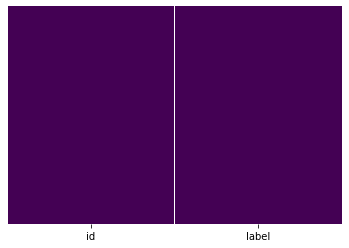

In [31]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
df.isnull().sum()

A visual way of checking is to the use the heatmap() function from Seaborn. I then add the dataframe setting it to display only isnull() values. Then I set the cmap to 'viridis' for my visual benefit. The purple image will indicate values being detected. Any yellow tints will indicate any null values being detected.

The sum() is also applied to numerically tell me if there are any null values.

In [ ]:
# Image size dimensions 96 x 96
IMAGE_SIZE = 96
# Number of channels set to 3, (3 is the specifically designed for smaller batches)
IMAGE_CHANNELS = 3
# The number of images for each of the two classes
SAMPLE_SIZE = 80000

<p>
Next is to define the image dimensions, this will be used for the preprocessing splitting and the actual neural network.
<br><br>
Since the neural network will compile over 1600000 images, to safe time and still maintain performance the image size will be capped by 96 x 96.
<br><br>
Number of channels will be set to 3 this is specifically designed for smaller batches
<br><br>
Sample size for each set will be 80000. In total there are 1600000 images so the class split will be 80000 
</p>

In [33]:
# Take a random sample of class 0 with size equal to num samples in class 1
df_0 = df[df['label'] == 0].sample(SAMPLE_SIZE, random_state = 101)
# filter out class 1
df_1 = df[df['label'] == 1].sample(SAMPLE_SIZE, random_state = 101)

# concat the dataframes
df = pd.concat([df_0, df_1], axis=0).reset_index(drop=True)
# shuffle
df = shuffle(df)

df['label'].value_counts()

0    80000
1    80000
Name: label, dtype: int64

<p>
Looking at the previous figure above, we know there is a imbalance between the binary values. This will cause bias in the model and skew my accuracy. Lets fix this, by using the SAMPLE_SIZE variable to set both binary values to 80000, a half split between the two.
<br><br>
The data is also set with a Random state to 101 and shuffle the dataframe. This is to keep the data varied for the neural network, since the only feature to work with will be the id's
</p>

In [34]:
df.head()

,id,label
59979,c3781ee152c9927da3ef73936c609c1305e55f80,0
16659,acdfeeeaf13d131bb96b01d9081ef666af81de42,0
88181,5619d509b3a8feace91c7b0be0836c4746fcaa4f,1
19649,17269472b6343a4ba2b482136f0e38107c0b7c48,0
155186,f45c4b211c4829ea2964d6c0d8cafe6d022fce7d,1


With the intial EDA and preprocess done. Next is to train_test_split the data and prepare the directories for the model

***

## Splitting the Data + Data Augmentation <a id="split"></a>

In [36]:
y = df['label']
df_train, df_val = train_test_split(df, test_size=0.10, random_state=101, stratify=y)

print(df_train.shape)
print(df_val.shape)

(144000, 2)
(16000, 2)


Here I called the train_test_split function and fed it the df values I balanced out. Also set test_size to 0.10 and random_state to 101. Common split = Train: 90%/Test: 10%
<br>
stratify = y creates a balanced validation set.
<br>
The df_train and df_val variables will be used for the model compiling

0    72000
1    72000
Name: label, dtype: int64


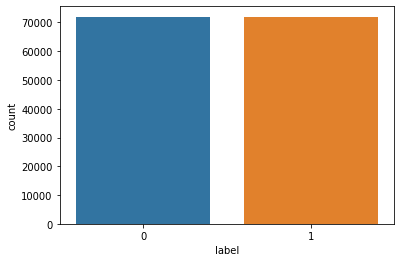

In [37]:
print(df_train['label'].value_counts())
sns.countplot(x='label', data=df_train);

We can now see the training data is now refected a more balanced result. Which means I am now good to go for compiling my models

0    8000
1    8000
Name: label, dtype: int64


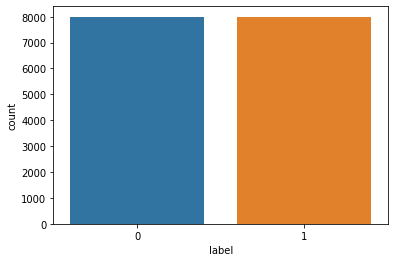

In [38]:
print(df_val['label'].value_counts())
sns.countplot(x='label', data=df_val)

We can now see the validation data is now refected a more balanced result. Which means I am now good to go for compiling my models

In [39]:
os.path.isdir('base_dir')

False

In [40]:
if os.path.isdir('base_dir'):
    print('the directory as well as the images have been created and sorted')
else:
    print('Sorting')
    # Create a new directory
    base_dir = 'base_dir'
    os.mkdir(base_dir)

    # create a path to 'base_dir' to which we will join the names of the new folders
    # train_dir
    train_dir = os.path.join(base_dir, 'train_dir')
    os.mkdir(train_dir)

    # val_dir
    val_dir = os.path.join(base_dir, 'val_dir')
    os.mkdir(val_dir)


    # create new folders inside train_dir
    no_tumor_tissue = os.path.join(train_dir, 'a_no_tumor_tissue')
    os.mkdir(no_tumor_tissue)
    has_tumor_tissue = os.path.join(train_dir, 'b_has_tumor_tissue')
    os.mkdir(has_tumor_tissue)


    # create new folders inside val_dir
    no_tumor_tissue = os.path.join(val_dir, 'a_no_tumor_tissue')
    os.mkdir(no_tumor_tissue)
    has_tumor_tissue = os.path.join(val_dir, 'b_has_tumor_tissue')
    os.mkdir(has_tumor_tissue)
    
    
    # Set the id as the index in df_data
    df.set_index('id', inplace=True)
    
    
    # Get a list of train and val images
    train_list = list(df_train['id'])
    val_list = list(df_val['id'])

    # Transfer the train images
    for image in train_list:
        
        # the id in the csv file does not have the .tif extension therefore we add it here
        fname = image + '.tif'
        # get the label for a certain image
        target = df.loc[image,'label']
        
        # these must match the folder names
        if target == 0:
            label = 'a_no_tumor_tissue'
        if target == 1:
            label = 'b_has_tumor_tissue'
        
        # source path to image
        src = os.path.join(url+'/train', fname)
        # destination path to image
        dst = os.path.join(train_dir, label, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)


    # Transfer the val images

    for image in val_list:
        
        # the id in the csv file does not have the .tif extension therefore we add it here
        fname = image + '.tif'
        # get the label for a certain image
        target = df.loc[image,'label']
        
        # these must match the folder names
        if target == 0:
            label = 'a_no_tumor_tissue'
        if target == 1:
            label = 'b_has_tumor_tissue'
        
        # source path to image
        src = os.path.join(url+'/train', fname)
        # destination path to image
        dst = os.path.join(val_dir, label, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)

Sorting


<p>
Now in order to make use of the train data then validation data respectively, the data will need to live in their own directories. The reason for this is to apply data augmenation to the sets seperately using the ImageGenerator. Then feed the correct directories to my model respectively, this is basically part of the splitting process.
<br>
This code will simply create the directories then apply label name changes.
    <ul>
    Training Directory:
        <li>a_no_tumor_tissue</li>
        <li>b_has_tumor_tissue</li>
    </ul>
     <ul>
    Validation Directory:
        <li>a_no_tumor_tissue</li>
        <li>b_has_tumor_tissue</li>
    </ul>
<br><br>
You might be wondering why I am indexing the labels alphabetically. This is because keras, for whatever reason will only assign index values to match what is in the train_labels.csv using an alphabetical order. So a small price to pay to make sure the model actually functions.
<br><br>
The code for the above definition has been attributed from the CNN - How to use 160,000 images without crashing Notebook from Kaggle.
<br>
Attribution: https://www.kaggle.com/code/vbookshelf/cnn-how-to-use-160-000-images-without-crashing 
<br><br>
</p>

In [ ]:
# check how many train images we have in each folder
print(len(os.listdir('base_dir/train_dir/a_no_tumor_tissue')))
print(len(os.listdir('base_dir/train_dir/b_has_tumor_tissue')))

72000
72000


Next is to check if the creation of the train_dir folders was succuessful and to make sure the distribution of the images is even.
<br>
The reason I want even split no tumor and has tumor is to assure no bias is added to the model

In [ ]:
# check how many val images we have in each folder
print(len(os.listdir('base_dir/val_dir/a_no_tumor_tissue')))
print(len(os.listdir('base_dir/val_dir/b_has_tumor_tissue')))

8000
8000


Next is to check if the creation of the val_dir folders was succuessful and to make sure the distribution of the images is even.
<br>
The reason I want even split no tumor and has tumor is to assure no bias is added to the model

In [ ]:
train_path = 'base_dir/train_dir'
valid_path = 'base_dir/val_dir'
test_path = '../input/test'

num_train_samples = len(df_train)
num_val_samples = len(df_val)
train_batch_size = 10
val_batch_size = 10


train_steps = np.ceil(num_train_samples / train_batch_size)
val_steps = np.ceil(num_val_samples / val_batch_size)

<p>
Next is to prepare the generator variables for the ImageDataGenerator.
<br><br>
First I capture the pathways to the correct directories;
    <ul>
        <li>Training</li>
        <li>Validation</li>
        <li>Test</li>
    </ul>
Then I calculated the steps for the neural netowrk. This is done by dividing and taking the first numeric value of samples (length of the dataframe) and the total batch size, which is capped at 10
<br><br>
The reason for the batch size being 10 is because I have the split at 0.10, so a 10% divide.
</p>

In [ ]:
datagen = ImageDataGenerator(rescale=1.0/255)

train_gen = datagen.flow_from_directory(train_path,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size=train_batch_size,
                                        class_mode='categorical')

val_gen = datagen.flow_from_directory(valid_path,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size=val_batch_size,
                                        class_mode='categorical')

# Note: shuffle=False causes the test dataset to not be shuffled
test_gen = datagen.flow_from_directory(valid_path,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size=1,
                                        class_mode='categorical',
                                        shuffle=False)

Found 144000 images belonging to 2 classes.
Found 16000 images belonging to 2 classes.
Found 16000 images belonging to 2 classes.


<p>
Now to create the generators for data augmentation.
<br><br>
Data Augmentation is used for image sets. It generates additional data from existing data by making minor changes, like rotation,flipping and even bluring. This creates more data to work with, which reduces variance, which in conclusion will reduce any overfitting from occuring.
<br><br>
First I created datagen variable that will rescale the the image sets to 255 pixels which is standard amount for greyscale
<br><br>
Then used the datagen method and feed the correct parameters to data augment the correct directories.
    <ul>
        <li>Path - pathway to the correct directory</li>
        <li>target_size - resize the images to the IMAGE_SIZE variable (90 x 90)</li>
        <li> batch_size - Per batch of the images to augment, defined from the previous variable</li>
        <li> class_mode - define the data being used, in this case categorical</li>
    </ul>
For the output it can be seen the images belonging for each generator.
<br>
144000 images for the training generator with the 2 binary classifcation classes
<br>
16000 images for the validation and test generator, 16000 is the 10% taken from the 160000 images.
</p>

***

## Creating CNN Layers <a id="cnn-layer"></a>

In [ ]:
#The sequence layers to build a CNN

model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (96, 96, 3)))
model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2))) 
model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), activation ='relu'))
model.add(Conv2D(64, (3,3), activation ='relu'))
model.add(Conv2D(64, (3,3), activation ='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), activation ='relu'))
model.add(Conv2D(128, (3,3), activation ='relu'))
model.add(Conv2D(128, (3,3), activation ='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(2, activation = "softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 94, 94, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 92, 92, 32)        9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 45, 45, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 45, 45, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 43, 43, 64)        18496     
                                                        

<p>
Convolution Neural Networks layer
<br><br>
    <ol>
        <li>Conv2D Layer - This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs. With a a relu activation function</li>
        <li>Max pooling operation for 2D spatial data downsamples the input along its spatial dimensions (height and width) by taking the maximum value over an input window (of size defined by pool_size) for each channel of the input.</li>
        <li>Dropout Layer - This layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting</li>
        <li>Flatten Layer - Flattens the input</li>
        <li>Dense Layer - This layer is deeply connected with its preceding layer which means the neurons of the layer are connected to every neuron of its preceding layer.</li>
        <li>Dropout Layer - This layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting</li>
        <li>Another Dense Layer - To make up for the previous dropout with a softmax activation function</li>
    </ol>
The input shape is set a 96 x 96 with 3 channels as this will be the best input for perfomance and accuracy
</p>

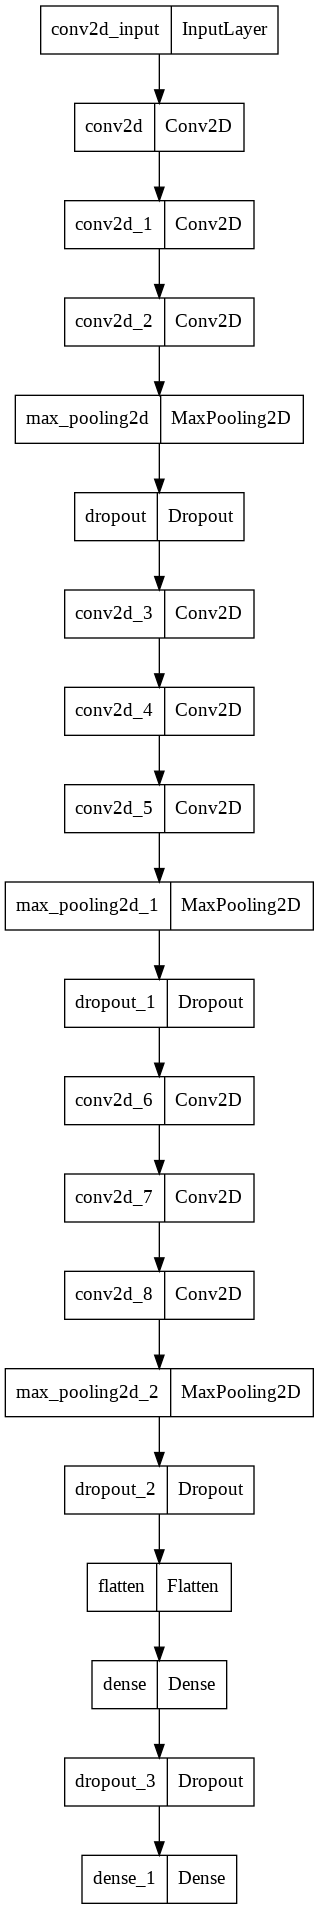

In [ ]:
plot_model(model)

Using plot model to have image visualization of my layer system

In [ ]:
model.compile(Adam(lr=0.0001), loss='binary_crossentropy', 
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Setup my model compiler with a learning rate of 0.0001

In [ ]:
# Get the labels names
print(val_gen.class_indices)

{'a_no_tumor_tissue': 0, 'b_has_tumor_tissue': 1}


Testing if the class indices are correct before running the neural network

***

## Training and Compiling CNN <a id="cnn"></a>

<p>
Right before I start compiling the model, I will also set up callback layers that will be called at the end of each epoch.
This will be useful to handle any over-fitting or under-fitting along with the dropout layer.
    <ol>
        <li>ModelCheckPoint - Saves best model while training based on the current metrics at the moment</li>
        <li>ReduceLROnPlateau - Changes a Learning Rate at specfic epoch to achieve more improved result</li>
    </ol>
</p>

In [ ]:
filepath = "model.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, 
                             save_best_only=True, mode='max')

reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=2, 
                                   verbose=1, mode='max', min_lr=0.00001)
                              
                              
callbacks_list = [checkpoint, reduce_lr]

history = model.fit_generator(train_gen, steps_per_epoch=train_steps, 
                    validation_data=val_gen,
                    validation_steps=val_steps,
                    epochs=10, verbose=1,
                   callbacks=callbacks_list)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  from ipykernel import kernelapp as app


Epoch 1/10
14399/14400 [============================>.] - ETA: 0s - loss: 0.4229 - accuracy: 0.8100

14400/14400 [==============================] - 307s 21ms/step - loss: 0.4229 - accuracy: 0.8101 - val_loss: 0.4485 - val_accuracy: 0.8022 - lr: 1.0000e-04
Epoch 2/10
14400/14400 [==============================] - ETA: 0s - loss: 0.3335 - accuracy: 0.8574

14400/14400 [==============================] - 251s 17ms/step - loss: 0.3335 - accuracy: 0.8574 - val_loss: 0.4360 - val_accuracy: 0.8163 - lr: 1.0000e-04
Epoch 3/10
14400/14400 [==============================] - ETA: 0s - loss: 0.2932 - accuracy: 0.8773

14400/14400 [==============================] - 226s 16ms/step - loss: 0.2932 - accuracy: 0.8773 - val_loss: 0.2704 - val_accuracy: 0.8861 - lr: 1.0000e-04
Epoch 4/10
14400/14400 [==============================] - ETA: 0s - loss: 0.2681 - accuracy: 0.8900

14400/14400 [==============================] - 227s 16ms/step - loss: 0.2681 - accuracy: 0.8900 - val_loss: 0.2482 - val_accuracy: 0.8983 - lr: 1.0000e-04
Epoch 5/10
14397/14400 [============================>.] - ETA: 0s - loss: 0.2528 - accuracy: 0.8977

14400/14400 [==============================] - 228s 16ms/step - loss: 0.2528 - accuracy: 0.8977 - val_loss: 0.2801 - val_accuracy: 0.8818 - lr: 1.0000e-04
Epoch 6/10
14397/14400 [============================>.] - ETA: 0s - loss: 0.2370 - accuracy: 0.9048

14400/14400 [==============================] - 228s 16ms/step - loss: 0.2370 - accuracy: 0.9048 - val_loss: 0.2272 - val_accuracy: 0.9083 - lr: 1.0000e-04
Epoch 7/10
14397/14400 [============================>.] - ETA: 0s - loss: 0.2261 - accuracy: 0.9096

14400/14400 [==============================] - 227s 16ms/step - loss: 0.2261 - accuracy: 0.9096 - val_loss: 0.2281 - val_accuracy: 0.9090 - lr: 1.0000e-04
Epoch 8/10
14400/14400 [==============================] - ETA: 0s - loss: 0.2162 - accuracy: 0.9142

14400/14400 [==============================] - 225s 16ms/step - loss: 0.2162 - accuracy: 0.9142 - val_loss: 0.2146 - val_accuracy: 0.9127 - lr: 1.0000e-04
Epoch 9/10
14399/14400 [============================>.] - ETA: 0s - loss: 0.2083 - accuracy: 0.9183

14400/14400 [==============================] - 227s 16ms/step - loss: 0.2083 - accuracy: 0.9183 - val_loss: 0.2138 - val_accuracy: 0.9159 - lr: 1.0000e-04
Epoch 10/10
14397/14400 [============================>.] - ETA: 0s - loss: 0.2016 - accuracy: 0.9213

14400/14400 [==============================] - 225s 16ms/step - loss: 0.2016 - accuracy: 0.9213 - val_loss: 0.2484 - val_accuracy: 0.9062 - lr: 1.0000e-04


Finally training the model...This should take like 6 mins on Google Colab

In [ ]:
model.metrics_names

['loss', 'accuracy']

Getting the metric names, for syntax reasons so I can copy and paste them later

***

## Model evaluation <a id="eval"></a>

<p>
With the the model trained and compiled, now to evaluate it
</p>

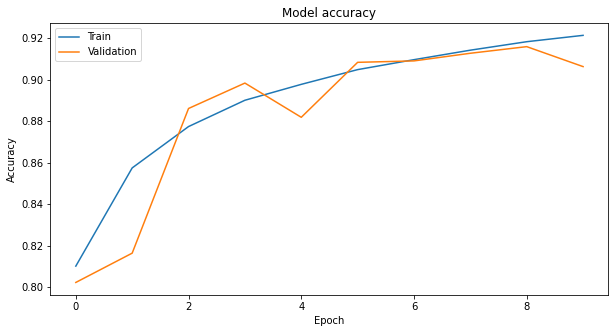

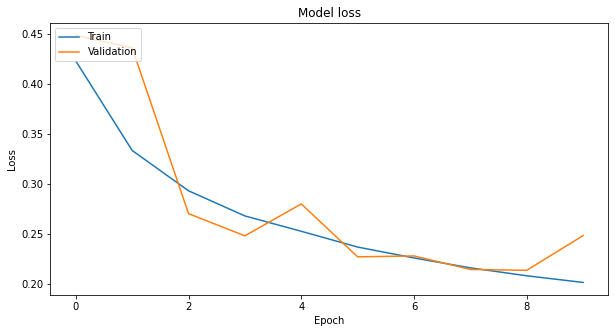

In [ ]:
# Model Accuracy
fig, axl = plt.subplots(figsize=(10,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

 # Model Loss
fig, axl = plt.subplots(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc = 'upper left')
plt.show()

<p>
Evaluating the Learning curve accuracy and Loss, I can see:
    <ul>
        <li>Model Accuracy - I can as the epochs progress, the accuracy goes up, which is what I want. This collide at 2 epochs, which might add towards to overfitting, but the dropout layer and the rollback layers clearly helps mends that in the process. At best the accuracy can be 90 to 91 percent near it's end, before overfitting.</li>
        <li>Model Loss - I can the model loss decreases as each epoch, this is good, showing the model is handling the data well per iteration, interestingly enough their is spike in validation at around epoch 4. but the Loss still continues which is good.</li>
    </ul>
</p>

In [ ]:
# predictions
predictions = model.predict_generator(test_gen, steps=len(df_val), verbose=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


16000/16000 [==============================] - 56s 3ms/step


In [ ]:
# dataframe predictions.
df_preds = pd.DataFrame(predictions, columns=['no_tumor', 'has_tumor'])
df_preds.head()

,no_tumor,has_tumor
0,1.000000,1.949123e-07
1,0.999972,2.769581e-05
2,0.998915,1.084880e-03
3,0.902855,9.714504e-02
4,0.992204,7.796046e-03


Creating a predictions data frame, I will need this to get my y_test, y_pred values

In [ ]:
# Get the true labels
y_test = test_gen.classes
# Get the predicted labels as probabilities
y_pred = df_preds['has_tumor']
# For this to work we need y_pred as binary labels not as probabilities
y_pred_binary = predictions.argmax(axis=1)

In [ ]:
# This function is serving as the Confusion Matrix Graph
# This will be needed for the evaluation of the graphs
# The function will take the y_test values and the prediciton value calculated in the model creation

def Confusion_Matrix_Graph():
  cm = confusion_matrix(y_test,y_pred_binary)
  plt.subplots(figsize=(18, 6))
  sns.heatmap(cm/np.sum(cm), annot= True, fmt='.2%', cmap='Blues')
  print('----------------------------------------------------------------')

<p>
Custom definiton for the confusion matrix, as well as to style it to present the excat accuracy percentage.
</p>

<p> A confusion matrix shows the total number of cases where:</p>
    <ul>
        <li>The model predicted Positive and the actual label is Positive (true positives; top left)</li>
        <li>The model predicted Negative and the actual label is Negative (true negatives; bottom right)</li>
        <li>The model predicted Negative and the actual label is Positive (false negatives; top right)</li>
        <li>The model predicted Postive and the actual label is Negative (false positives; bottom left)</li>
    </ul>

In [ ]:
# This function is serving as the ROC Curve Graph
# This will be needed for the evaluation of the graphs
# The function will take the X_test and y_test as parameters

def ROC_Curve_Graph():
  fpr, tpr, _ = roc_curve(y_test,  y_pred)
  auc = roc_auc_score(y_test, y_pred)
  plt.subplots(figsize=(18, 6))
  plt.plot(fpr,tpr,label="Prediction, auc="+str(auc))
  plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
  plt.legend(loc=4)
  plt.show()

<p>
Custom definiton for the ROC Chart, shows the curve of the true and flase positive rates for different values between 0 and 1. A perfect classifier would have a curve that goes straight up the left side and straight across the top. The diagonal line across the char represents the probability of predicting correctly with a 50/50 random prediciton. Therefore I want the curve to be higher and more distant from the diagonal line. Because it basically confirms that the model is certainly positive of it's predictions with no guessing.
</p>
<p>
Another point the graph will be doing is calculating the AUC. The Area Under the Curve (AUC) is a value between 0 and 1 that quantifies the overall performance of the model.
</p>

In [ ]:
def Classification_Report():
  display(HTML('convolutional neural network'))
  print('----------------------------------------------------------------')
  print("The Accuracy of the model is : ", accuracy_score(y_test, y_pred_binary)*100, "%")
  print('----------------------------------------------------------------')
  # Look at classification report to evaluate the model
  print(classification_report(y_test, y_pred_binary, target_names = ['no_tumor', 'has_tumor']))
  print('----------------------------------------------------------------')

<p>
This definition will act as my classification report
<br><br>
For the report
<br>
Accuracy Training and Test Score : represents how well the model peformed with the presented training and test data. Not only are these useful for accuracy tracking of the model, they also tell us if we are over or under fitting. Since both values are respectively high, this is a good sign that the model is doing well.
<br><br>
The overall accuracy of the model : basically lets us know how accurate the model is.
<br><br>
NOTE: Just examining the accuracy is not enough, which is why the next step is to analyze the classification report. For the classifcation report we are given 4 metrics to examine.
<ul>
    <li>Precision: Of the predictions the model made for this class, what proportion were correct</li>
    <li>Recall: Out of all of the instances of this class in the test dataset, how many did the model identify</li>
    <li>F1-Score: An average metric that takes both precision and recall into account</li>
    <li>Support: How many instances of this class are there in the test dataset</li>
</ul>
<br>
While all 4 are important, for classification the 2 I wish to focus on is Precision and Recall. For Precision having high metrics will ensure that the model is correct in its true predicitions. For Recall this assures us that the model is reading and identifying the dataset correctly. It is possible to have a high Precision and Low Recall (which would be bad, but since both are high, this means the model is performing well) 
</p>

For my neural network evaluation, since I am calling so many custom definitions, I will use a pipeline to fit each custom graph and call them respectively

----------------------------------------------------------------
The Accuracy of the model is :  90.625 %
----------------------------------------------------------------
              precision    recall  f1-score   support

    no_tumor       0.95      0.86      0.90      8000
   has_tumor       0.87      0.95      0.91      8000

    accuracy                           0.91     16000
   macro avg       0.91      0.91      0.91     16000
weighted avg       0.91      0.91      0.91     16000

----------------------------------------------------------------
----------------------------------------------------------------


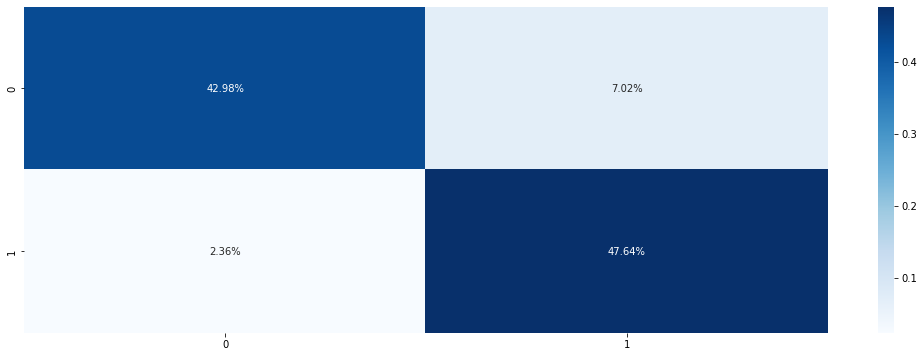

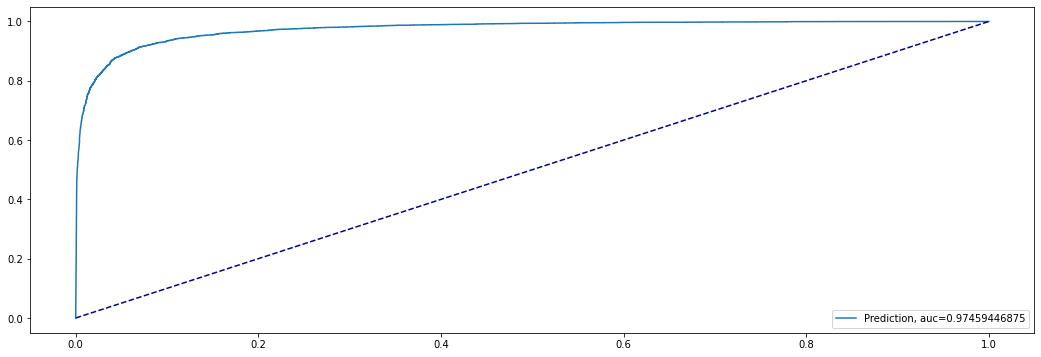

----------------------------------------------------------------


In [ ]:
pipeline = Pipeline(steps=[('classification_report', Classification_Report()),('confusion_matrix_graph',Confusion_Matrix_Graph()),('ROC_Curve_Graph',ROC_Curve_Graph())])

<p>
Looking at the classification report, confusion matrix and ROC Curve, the information is as follows:
<br><br>
<h3>Classification Report Recap</h3>
    <ul>
        <li>The Accuracy of the model is : 90.60%</li>
    </ul>
    <ul>
        <br>
        <li>val_accuracy: 90%</li>
        <li>val_loss: 0.2</li>
        <br>
        <li>accuracy: 92%</li>
        <li>loss: 0.2</li>
        <br>
        <li>Precision[no_tumor]: 95%</li>
        <li>Precision[has_tumor]: 87%</li>
        <br>
        <li>Recall[no_tumor]: 86%</li>
        <li>Recall[has_tumor]: 95%</li>
         <br>
    </ul>
    All values are closely correlated with another, which is a good sign of no over/under fitting, and with a high Precision and Recall, I know a good portion of the dataset is being taken into consideration.
    <br><br>
    For the case of the graph, I also have legend indicating the value amounts. So for the case of the analysis if the false predictions are above the second element (that being 0.2, starting from the bottom). Then the accuracy cannot be trusted. However for the case of this graph, the false predictions are below the second element.
    <br><br>
    Both True Positive and False Positive were the highest point in the Confusion Matrix Graph.
    <br>
    For the ROC Curve graph, I we have a very high postive curve with a natural shape 
    <br>
    AUC = 0.97, basically on the verge of touching 1, the ROC Curve has performed extremly well.
    <br>
    This tells the the model is as accurate as it can be for CNN
</p>